In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [27]:
filter_difficulty = [col for col in class_df.columns if col.startswith("How difficult")]
print(filter_difficulty)

['How difficult did you find each 1A course to be? [101L]', 'How difficult did you find each 1A course to be? [101]', 'How difficult did you find each 1A course to be? [111]', 'How difficult did you find each 1A course to be? [113]', 'How difficult did you find each 1A course to be? [121]', 'How difficult did you find each 1A course to be? [161]', 'How difficult did you find each 1A course to be? [181]']


In [28]:
filter_usefulness = [col for col in class_df.columns if col.startswith("How useful did")]
print(filter_usefulness)

['How useful did you find each of the 1A courses to be? [101L]', 'How useful did you find each of the 1A courses to be? [101]', 'How useful did you find each of the 1A courses to be? [111]', 'How useful did you find each of the 1A courses to be? [113]', 'How useful did you find each of the 1A courses to be? [121]', 'How useful did you find each of the 1A courses to be? [161]', 'How useful did you find each of the 1A courses to be? [181]']


In [ ]:
filter_all = filter_difficulty + filter_usefulness
useful_difficult_df = class_df[filter_all]
print(useful_difficult_df)

In [ ]:
nums_df = useful_difficult_df.replace({"Easy": 2, "Very Useful": 2, "Somewhat Easy": 1, "Somewhat Useful": 1, 
                                       "Neutral": 0, "Somewhat Difficult": -1, "Somewhat Useless": -1, 
                                       "Useless": -2, "Very Difficult": -2})
nums_df.head()

In [31]:
averaged_nums = nums_df.apply(lambda col: col.mean(), axis="rows")
print(averaged_nums)

How difficult did you find each 1A course to be? [101L]         0.340426
How difficult did you find each 1A course to be? [101]          1.574468
How difficult did you find each 1A course to be? [111]         -1.106383
How difficult did you find each 1A course to be? [113]         -0.680851
How difficult did you find each 1A course to be? [121]          0.180851
How difficult did you find each 1A course to be? [161]          0.191489
How difficult did you find each 1A course to be? [181]          0.063830
How useful did you find each of the 1A courses to be? [101L]    1.021277
How useful did you find each of the 1A courses to be? [101]    -0.797872
How useful did you find each of the 1A courses to be? [111]     1.223404
How useful did you find each of the 1A courses to be? [113]     0.702128
How useful did you find each of the 1A courses to be? [121]     1.808511
How useful did you find each of the 1A courses to be? [161]     0.617021
How useful did you find each of the 1A courses to b

In [32]:
difficulty = averaged_nums[filter_difficulty]
usefulness = averaged_nums[filter_usefulness]
# index both series so that they use course codes as indicies
index_vals = ["101L", "101", "111", "113", "121", "161", "181"]
difficulty.index = index_vals
usefulness.index = index_vals

print(difficulty, usefulness)

101L    0.340426
101     1.574468
111    -1.106383
113    -0.680851
121     0.180851
161     0.191489
181     0.063830
dtype: float64 101L    1.021277
101    -0.797872
111     1.223404
113     0.702128
121     1.808511
161     0.617021
181     0.634409
dtype: float64


In [33]:
averaged_nums_df = pd.concat([difficulty, usefulness], axis="columns")
# change the column names
new_cols = ["difficulty", "usefulness"]
averaged_nums_df.columns = new_cols

averaged_nums_df.head(7)

,difficulty,usefulness
101L,0.340426,1.021277
101,1.574468,-0.797872
111,-1.106383,1.223404
113,-0.680851,0.702128
121,0.180851,1.808511
161,0.191489,0.617021
181,0.063830,0.634409


[Text(0, 0, 'Very Difficult'),
 Text(0, 0, ''),
 Text(0, 0, 'Somewhat Difficult'),
 Text(0, 0, ''),
 Text(0, 0, 'Neutral'),
 Text(0, 0, ''),
 Text(0, 0, 'Somewhat Easy'),
 Text(0, 0, ''),
 Text(0, 0, 'Easy')]

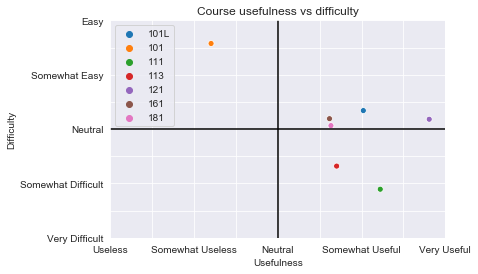

In [34]:
# change background style
sns.set_style("darkgrid")

# plot data
ax = sns.scatterplot(data=averaged_nums_df, x="usefulness", y="difficulty", hue=averaged_nums_df.index)
ax.set_title("Course usefulness vs difficulty")
ax.set_xlabel("Usefulness")
ax.set_ylabel("Difficulty")

# change the limits of the plot
ax.set(xlim=(-2, 2), ylim=(-2,2))

# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
x_labels_1 = ["Useless", "", "Somewhat Useless", "", "Neutral", "", "Somewhat Useful", "", "Very Useful"]
y_labels = ["Very Difficult", "", "Somewhat Difficult", "", "Neutral", "", "Somewhat Easy", "", "Easy"]
ax.set_xticklabels(x_labels_1)
ax.set_yticklabels(y_labels)

# label each point
# for line in range(0,averaged_nums_df.shape[0]):
#      ax.text(averaged_nums_df.usefulness[line], averaged_nums_df.difficulty[line], averaged_nums_df.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

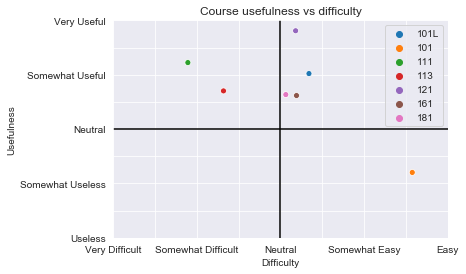

In [35]:
# change background style
sns.set_style("darkgrid")

# plot data
ax = sns.scatterplot(data=averaged_nums_df, x="difficulty", y="usefulness", hue=averaged_nums_df.index)
ax.set_title("Course usefulness vs difficulty")
ax.set_xlabel("Difficulty")
ax.set_ylabel("Usefulness")

# change the limits of the plot
ax.set(xlim=(-2, 2), ylim=(-2,2))

# show x and y axes
ax.axvline(color="black")
ax.axhline(color="black")

# change tick labels
y_labels = ["Useless", "", "Somewhat Useless", "", "Neutral", "", "Somewhat Useful", "", "Very Useful"]
x_labels = ["Very Difficult", "", "Somewhat Difficult", "", "Neutral", "", "Somewhat Easy", "", "Easy"]
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax.figure.savefig('graphs/usefulness_v_difficulty.png')

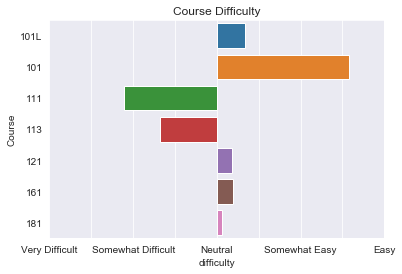

In [36]:
#graph the difficulties in bar graph
difficulty_plot = sns.barplot(data=averaged_nums_df, x="difficulty", y=averaged_nums_df.index)
difficulty_plot.set_ylabel('Course')
difficulty_plot.set_title('Course Difficulty')
difficulty_plot.set(xlim=(-2, 2))
difficulty_plot.set_xticklabels(x_labels)
difficulty_plot.figure.savefig('graphs/course_difficulty.png')

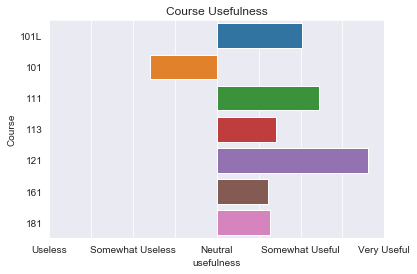

In [37]:
#graph the usefulness in bar graph
difficulty_plot = sns.barplot(data=averaged_nums_df, x="usefulness", y=averaged_nums_df.index)
difficulty_plot.set_ylabel('Course')
difficulty_plot.set_title('Course Usefulness')
difficulty_plot.set(xlim=(-2, 2))
difficulty_plot.set_xticklabels(x_labels_1)
difficulty_plot.figure.savefig('graphs/course_usefulness.png')